## Data Science and Big Data 95-885 CMU Spring 2019
### Carol Xiang and Daniel Lesser

## Import Statements

In [1]:
#for AWS
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install graphviz

In [3]:
#Data and plotting
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE
from sklearn.tree import export_graphviz 

#Machine Learning Algorithms
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

#Measurements
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

#Supress warnings
import warnings
warnings.filterwarnings("ignore")

#Others
from sklearn.utils.multiclass import unique_labels
from sklearn.manifold import TSNE
from sklearn.utils import resample
import graphviz

## Loading in Data

In [4]:
dataIn = pd.read_csv('./Dataset/diabetic_data.csv')

In [5]:
dataIn.shape

(101766, 50)

In [6]:
dataIn.head(5).T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [7]:
dataIn.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [8]:
id_cols = ['encounter_id', 'patient_nbr']
cat_cols = ['race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id',
           'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
           'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
           'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 
           'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
           'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
cont_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
            'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
diag_cols = ['diag_1', 'diag_2', 'diag_3']
diag_cols_new = ['diag_1_abbrv', 'diag_2_abbrv', 'diag_3_abbrv']

In [9]:
for feature in dataIn.columns:
    if feature not in id_cols:
        print(feature, ": ", Counter(dataIn[feature]))
        print()

race :  Counter({'Caucasian': 76099, 'AfricanAmerican': 19210, '?': 2273, 'Hispanic': 2037, 'Other': 1506, 'Asian': 641})

gender :  Counter({'Female': 54708, 'Male': 47055, 'Unknown/Invalid': 3})

age :  Counter({'[70-80)': 26068, '[60-70)': 22483, '[50-60)': 17256, '[80-90)': 17197, '[40-50)': 9685, '[30-40)': 3775, '[90-100)': 2793, '[20-30)': 1657, '[10-20)': 691, '[0-10)': 161})

weight :  Counter({'?': 98569, '[75-100)': 1336, '[50-75)': 897, '[100-125)': 625, '[125-150)': 145, '[25-50)': 97, '[0-25)': 48, '[150-175)': 35, '[175-200)': 11, '>200': 3})

admission_type_id :  Counter({1: 53990, 3: 18869, 2: 18480, 6: 5291, 5: 4785, 8: 320, 7: 21, 4: 10})

discharge_disposition_id :  Counter({1: 60234, 3: 13954, 6: 12902, 18: 3691, 2: 2128, 22: 1993, 11: 1642, 5: 1184, 25: 989, 4: 815, 7: 623, 23: 412, 13: 399, 14: 372, 28: 139, 8: 108, 15: 63, 24: 48, 9: 21, 17: 14, 16: 11, 19: 8, 10: 6, 27: 5, 12: 3, 20: 2})

admission_source_id :  Counter({7: 57494, 1: 29565, 17: 6781, 4: 3187, 6:

nateglinide :  Counter({'No': 101063, 'Steady': 668, 'Up': 24, 'Down': 11})

chlorpropamide :  Counter({'No': 101680, 'Steady': 79, 'Up': 6, 'Down': 1})

glimepiride :  Counter({'No': 96575, 'Steady': 4670, 'Up': 327, 'Down': 194})

acetohexamide :  Counter({'No': 101765, 'Steady': 1})

glipizide :  Counter({'No': 89080, 'Steady': 11356, 'Up': 770, 'Down': 560})

glyburide :  Counter({'No': 91116, 'Steady': 9274, 'Up': 812, 'Down': 564})

tolbutamide :  Counter({'No': 101743, 'Steady': 23})

pioglitazone :  Counter({'No': 94438, 'Steady': 6976, 'Up': 234, 'Down': 118})

rosiglitazone :  Counter({'No': 95401, 'Steady': 6100, 'Up': 178, 'Down': 87})

acarbose :  Counter({'No': 101458, 'Steady': 295, 'Up': 10, 'Down': 3})

miglitol :  Counter({'No': 101728, 'Steady': 31, 'Down': 5, 'Up': 2})

troglitazone :  Counter({'No': 101763, 'Steady': 3})

tolazamide :  Counter({'No': 101727, 'Steady': 38, 'Up': 1})

examide :  Counter({'No': 101766})

citoglipton :  Counter({'No': 101766})

insulin

##### Features changes to make:

1. Drop rows with unknown/invalid gender and/or missing race
2. Delete these columns due to high proportion of missing values:

    weight, payer_code, medical_specialty, 
3. Fill in missing values '?' for the following columns:

    race, weight, payer_code, medical_specialty, diag_1, diag_2, diag_3,readmitted
    
    
4. Turn the following columns into categorical columns via OHE

    admission_type_id, discharge_disposition_id, admission_source_id, race
    
    
4. Turn the following columns into ordinal features

    Age
    
    Test results: max_glu_serum, A1Cresult
    
    All medications from metformin through metformin-pioglitazone
    
    
5. Turn the following columns into binary columns (1,0)

    change, diabetesMed, readmitted, gender
    
    
6. Group together diag_1,diag_2 and diag_3 into one column with combined counts.
7. Group together diag_123 into smaller subgroups using ICD9 codings
8. Turn diag_123 into dummy features via OHE

## Data Cleaning

### Dealing with missing values

In [10]:
#Drop unknown/invalid gender columns
origRows = dataIn.shape[0]
dataIn = dataIn[dataIn.gender != 'Unknown/Invalid']
print(origRows-dataIn.shape[0], " rows dropped")

3  rows dropped


In [11]:
#Drop Weight column due to high proportion of '?'
dataIn.drop('weight',axis=1, inplace=True)
dataIn.drop('payer_code', axis=1, inplace=True)
dataIn.drop('medical_specialty', axis=1, inplace=True)

In [12]:
#Replace '?' with NaN
dataIn.replace('?', np.NaN, inplace=True)

In [13]:
dataIn.isna().sum()

encounter_id                   0
patient_nbr                    0
race                        2271
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazo

In [14]:
#Drop n.a rows for race
origRows = dataIn.shape[0]
dataIn = dataIn[dataIn.gender != 'Unknown/Invalid']
dataIn.dropna(subset=['race'], inplace=True)
print(origRows-dataIn.shape[0], " rows dropped")

2271  rows dropped


### Transforming Categorical Features to Ordinal or Binary Features

In [15]:
# One-hot-encoding the following columns 
ohe_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'race']

for col_name in ohe_cols:
    # n/a not encoded, include all the encoded columns except the first one
    dataIn = pd.concat([dataIn, pd.get_dummies(dataIn[col_name], drop_first=True,prefix=col_name)],axis=1)

In [16]:
# Turn the following columns (test results, medications and age) into ordinal features
ord_cols = ['max_glu_serum', 'A1Cresult',
           'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
           'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 
           'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
           'metformin-rosiglitazone', 'metformin-pioglitazone',
           'age']        

def change_ord_cols(value):
    '''
    Takes a feature and converts it into an ordinal column.  Based on value domain available in the
    original dataset.  If additional features and/or values are added, this method needs to be adjusted
    to account for that.
    '''
    if value == 'None' or value == 'No':
        return '0'
    elif value == 'Norm' or value == 'Down':
        return '1'
    elif value in ['>200', '>7', 'Steady']:
        return '2'
    elif value in ['>300', '>8', 'Up']:
        return '3'

ord_cols_new = []

for col_name in ord_cols[:-1]:
    new_col_name = col_name + "_ord"
    ord_cols_new.append(new_col_name)
    dataIn[new_col_name] = dataIn[col_name].map(lambda x: int(change_ord_cols(x)))

dataIn['age_ord'] = dataIn['age'].map(lambda x: x[1:2])

In [17]:
# Turn the following columns into binary features
# Had change, prescribed biabetes med, readmitted<30  ==>  1
# No change, did not prescribed diabetes med, not readmitted or readmitted>30  ==>  0
# Male ==>  1

bin_cols = ['change', 'diabetesMed', 'readmitted', 'gender']

def change_bin_cols(value):
    '''
    Creates dummy binary features based on input columns.
    '''
    if value in ['No', 'NO', '>30', 'Female']:
        return '0'
    elif value in ['Ch', 'Yes', '<30', 'Male']:
        return '1'  

bin_cols_new = []
for col_name in bin_cols:
    new_col_name = col_name + "_bin"
    bin_cols_new.append(new_col_name)
    dataIn[new_col_name] = dataIn[col_name].map(lambda x: int(change_bin_cols(x)))

dataIn.rename(columns={'gender_bin':'is_male'}, inplace=True)

##### Version 2: OHE both categorical and ordinal columns
We tested our models on data using this method of feature transformations. Models' performance got worse so we decided not to use this version.

In [ ]:
# One-hot-encoding the following columns (categorical and ordinal columns)
cat_ord_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'race'
                ,'max_glu_serum', 'A1Cresult',
           'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
           'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 
           'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
           'metformin-rosiglitazone', 'metformin-pioglitazone',
           'age'] 

for col_name in cat_ord_cols:
    # n/a not encoded, include all the encoded columns except the first one
    dataIn = pd.concat([dataIn, pd.get_dummies(dataIn[col_name], drop_first=True,prefix=col_name)],axis=1)

### Combining Diagnoses

In [18]:
#Reduce each diag code to first 3 letters.
for diag in diag_cols:
    diagNew = diag+"_abbrv"
    dataIn[diagNew] = dataIn[diag].str[:3]

In [19]:
#Note: need to handle a few categories differently

#For infectious conditions
infec_list = ['00{}'.format(i) for i in range(1, 10)]
temp = ['0{}'.format(i) for i in range(10, 100)]
infec_list+=temp
temp = ['{}'.format(i) for i in range(100, 140)]
infec_list+=temp

In [20]:
#for supplementary conditions
suppl_list = ['V0{}'.format(i) for i in range(1, 10)]
temp = ['V{}'.format(i) for i in range(10, 92)]
suppl_list+= temp

In [21]:
#for external conditions
external_list = ['E00{}'.format(i) for i in range(0, 10)]
temp = ['E0{}'.format(i) for i in range(10, 31)]
external_list+= temp
temp = ['E{}'.format(i) for i in range(800, 1000)]
external_list+= temp

In [22]:
external_list

['E000',
 'E001',
 'E002',
 'E003',
 'E004',
 'E005',
 'E006',
 'E007',
 'E008',
 'E009',
 'E010',
 'E011',
 'E012',
 'E013',
 'E014',
 'E015',
 'E016',
 'E017',
 'E018',
 'E019',
 'E020',
 'E021',
 'E022',
 'E023',
 'E024',
 'E025',
 'E026',
 'E027',
 'E028',
 'E029',
 'E030',
 'E800',
 'E801',
 'E802',
 'E803',
 'E804',
 'E805',
 'E806',
 'E807',
 'E808',
 'E809',
 'E810',
 'E811',
 'E812',
 'E813',
 'E814',
 'E815',
 'E816',
 'E817',
 'E818',
 'E819',
 'E820',
 'E821',
 'E822',
 'E823',
 'E824',
 'E825',
 'E826',
 'E827',
 'E828',
 'E829',
 'E830',
 'E831',
 'E832',
 'E833',
 'E834',
 'E835',
 'E836',
 'E837',
 'E838',
 'E839',
 'E840',
 'E841',
 'E842',
 'E843',
 'E844',
 'E845',
 'E846',
 'E847',
 'E848',
 'E849',
 'E850',
 'E851',
 'E852',
 'E853',
 'E854',
 'E855',
 'E856',
 'E857',
 'E858',
 'E859',
 'E860',
 'E861',
 'E862',
 'E863',
 'E864',
 'E865',
 'E866',
 'E867',
 'E868',
 'E869',
 'E870',
 'E871',
 'E872',
 'E873',
 'E874',
 'E875',
 'E876',
 'E877',
 'E878',
 'E879',
 

In [23]:
#Codes from http://www.icd9data.com/2015/Volume1/default.htm
diag_codes = {'Infect_Paras_d' : np.arange(1,140), 'Neoplasm_d' : np.arange(140,240),
             'Endo_Nutri_Immun_d' : np.arange(240,280), 'Blood_d' : np.arange(280,290),
             'Mental_d' : np.arange(290,320), 'Nervous_d' : np.arange(320, 390), 
             'Circulatory_d' : np.arange(390, 460), 'Respiratory_d' : np.arange(460, 520),
             'Digestive_d' : np.arange(520, 580), 'Genitourinary' : np.arange(580, 630), 
             'Pregnancy_d' : np.arange(630, 680), 'Skin_d' : np.arange(680,710), 
             'Muscu_Connective_d' : np.arange(710, 740), 'Congentinal_d' : np.arange(740, 760), 
             'Perinatal_d' : np.arange(760, 780), 'Ill_Defined_d' : np.arange(780, 800), 
             'Injury_d' : np.arange(800, 1000), 'Supplementary_d' : suppl_list, 
             'External_d' : external_list}

In [24]:
dataIn[dataIn['diag_3'].isin(external_list)].T #for some reason external_d isn't getting encoded??

,159,440,479,692,696,763,832,1051,1271,1652,...,101133,101165,101186,101242,101260,101431,101515,101570,101703,101707
encounter_id,2476920,3936522,4171512,5293998,5319174,5914314,6504906,7870338,8946336,11091954,...,435488558,436055138,436129910,436735964,437231636,439082486,440251070,441338738,443191964,443197808
patient_nbr,4279149,78770403,435366,1697436,87847776,64052667,1734102,1149777,458415,567828,...,97086861,43900875,31492026,86534235,41137614,141453482,182326865,124235987,125535857,141379232
race,Caucasian,Caucasian,Caucasian,Caucasian,Other,Caucasian,AfricanAmerican,Caucasian,Caucasian,AfricanAmerican,...,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Male,Female,Female,Male,Female,Male,Female,Female,Female,...,Female,Female,Male,Female,Female,Male,Female,Male,Male,Male
age,[80-90),[60-70),[50-60),[70-80),[70-80),[70-80),[50-60),[40-50),[80-90),[60-70),...,[70-80),[40-50),[80-90),[80-90),[70-80),[70-80),[70-80),[70-80),[10-20),[50-60)
admission_type_id,6,1,6,6,6,6,6,1,1,1,...,2,1,1,1,1,1,1,1,1,1
discharge_disposition_id,25,1,25,25,6,1,25,7,5,5,...,6,2,6,3,1,3,1,1,1,3
admission_source_id,1,7,1,7,7,7,7,1,7,1,...,7,7,7,7,7,7,7,7,7,7
time_in_hospital,5,2,5,2,11,3,11,1,4,7,...,2,2,7,5,3,5,2,2,3,5
num_lab_procedures,54,55,12,84,71,40,36,49,66,55,...,64,57,76,55,20,75,10,17,44,39


In [25]:
#convert to strings for easy comparison to diag_1, diag_2, diag_3
for key, value in diag_codes.items():
    diag_codes[key] = [str(i) for i in value]

In [26]:
#create blank columns
for c in diag_codes:
    dataIn[c] = 0

In [27]:
def diagonsis_col_creation(row, diag_code, diag_col):
    '''
    Loops through the values in the diagnoses codes and returns 1 if the diagnosis provided
    matches that grouping, otherwise returns zero. For use with DataFrame.apply().  Row = row in dataframe.
    diag_cols = one of the three diag_1, _2, _3 columns in dataframe.  diag_code = grouped codings.
    '''
    
    #check first if its already = 1
    if row[diag_code] == np.NaN:
        return 0
    elif row[diag_code] == 1:
        return 1
    else:
        if row[diag_col] in diag_codes[diag_code]:
            return 1
        else:
            return 0

In [28]:
#do coding for dummy disease columns
for diag_code in diag_codes: #loop through to create all the columns
    for diag_col in diag_cols_new: #go through each of the three diagonses
        dataIn[diag_code] = dataIn.apply(lambda row: diagonsis_col_creation(row, diag_code,diag_col),axis=1)

In [29]:
dataIn.sample(5).T

,57599,76041,74616,59574,9944
encounter_id,164149260,229095444,222344796,167559114,42632598
patient_nbr,41095215,54519804,85341717,88204779,114753042
race,Caucasian,Caucasian,Caucasian,AfricanAmerican,Caucasian
gender,Female,Male,Female,Female,Male
age,[60-70),[90-100),[60-70),[60-70),[70-80)
admission_type_id,1,1,3,1,6
discharge_disposition_id,6,3,22,1,6
admission_source_id,7,7,1,7,17
time_in_hospital,2,4,6,5,12
num_lab_procedures,10,51,34,54,79


##### Version 2: keep all the diagnosis OHE separate (e.g. one set of OHE for each diag_1, diag_2, diag_3
Again, models' performance using this version of feature engineerting got worse. We decided not to use this version.

In [ ]:
def diagonsis_col_creation_unique(row, diag_code, diag_col):
    '''
    Loops through the values in the diagnoses codes and returns 1 if the diagnosis provided
    matches that grouping, otherwise returns zero. For use with DataFrame.apply().  Row = row in dataframe.
    diag_cols = one of the three diag_1, _2, _3 columns in dataframe.  diag_code = grouped codings.
    '''
    
    if row[diag_col] in diag_codes[diag_code]:
        return 1
    else:
        return 0

In [ ]:
for diag_col in diag_cols_new: #go through each of the three diagonses
    for diag_code in diag_codes: #loop through to create all the columns
        newcol = diag_col + '_' + diag_code 
        dataIn[newcol] = dataIn.apply(lambda row: diagonsis_col_creation_unique(row, diag_code,diag_col),axis=1)

### Boolean Type 1 vs. Type 2 diabetes as top 3 diagnosis

In [30]:
diab_types = {'Type1_d' : ['250.01', '250.03', '250.11', '250.13', '250.21', '250.23','250.31', '250.33',
        '250.41', '250.43','250.51', '250.53','250.61', '250.63','250.71', '250.73',
        '250.81', '250.83','250.91', '250.93'], 
             'Type2_d' : ['250.00', '250.02', '250.10', '250.12', '250.20', '250.22','250.30', '250.32',
        '250.40', '250.42','250.50', '250.52','250.60', '250.62','250.70', '250.72',
        '250.80', '250.82','250.90', '250.92'],
             'TypeGeneric_d' : ['250','250.1', '250.2', '250.3', '250.4', '250.5', '250.6', 
                                '250.7', '250.8', '250.9']}

In [31]:
dataIn['Type1_d'] = 0
dataIn['Type2_d'] = 0
dataIn['TypeGeneric_d'] = 0

In [32]:
def diabetesType(row, diag_type, diag_col):
    '''
    Loops through the values in the diagnoses codes and returns a 1 or 0 depending on whether
    the patient has that type of diabetes or not
    '''
    #print(diag_type)
    #print(diag_col)
    #print(row[diag_col])
    
    #check if already matched first
    if row[diag_type] == 1:
        return 1
    elif row[diag_col] in diab_types[diag_type]:
        return 1
    else:
        return 0

In [33]:
#do coding for dummy disease columns
for diag_col in diag_cols: #loop through to create all the columns
    for diab_type in diab_types: #go through each of the three diagonses
        dataIn[diab_type] = dataIn.apply(lambda row: diabetesType(row, diab_type,diag_col),axis=1)

In [34]:
dataIn.sample(5).T

,84058,97241,7649,79591,24073
encounter_id,264337914,386143430,35843094,244361130,81836778
patient_nbr,107413992,161498840,1507581,32126913,6780717
race,Asian,Other,Caucasian,Caucasian,AfricanAmerican
gender,Male,Female,Female,Female,Female
age,[70-80),[40-50),[50-60),[70-80),[60-70)
admission_type_id,2,1,2,1,1
discharge_disposition_id,11,1,6,1,3
admission_source_id,7,7,4,7,7
time_in_hospital,6,2,1,3,5
num_lab_procedures,45,20,5,73,46


### Data Visualization

In [35]:
diags = {}
for diag in diag_codes:
    diags[diag] = sum(dataIn[diag])
diags = pd.DataFrame(diags, index=[0])

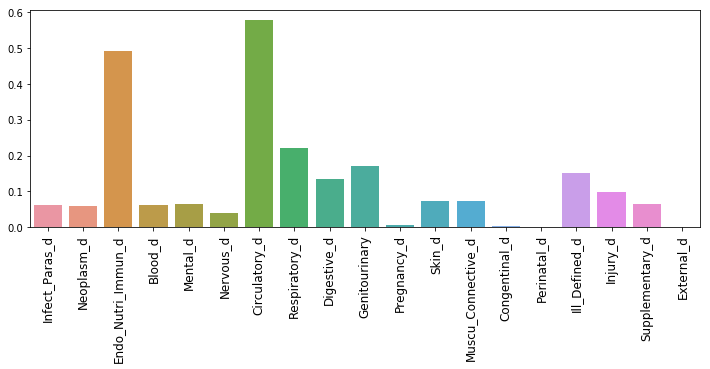

In [36]:
fig = plt.figure(figsize=(12,4))
ax = sns.barplot(data=diags/len(dataIn))
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [37]:
med_cols = ['max_glu_serum_ord','A1Cresult_ord','metformin_ord','repaglinide_ord','nateglinide_ord'
,'chlorpropamide_ord','glimepiride_ord','acetohexamide_ord','glipizide_ord','glyburide_ord'
,'tolbutamide_ord','pioglitazone_ord','rosiglitazone_ord','acarbose_ord','miglitol_ord'
,'troglitazone_ord','tolazamide_ord','examide_ord','citoglipton_ord','insulin_ord','glyburide-metformin_ord'
,'glipizide-metformin_ord','glimepiride-pioglitazone_ord','metformin-rosiglitazone_ord','metformin-pioglitazone_ord']

In [38]:
meds = {} #consider doing as a stacked area chart (count of down/steady/up)
for med in med_cols:
    meds[med] = sum(dataIn[med])
meds = pd.DataFrame(meds, index=[0])

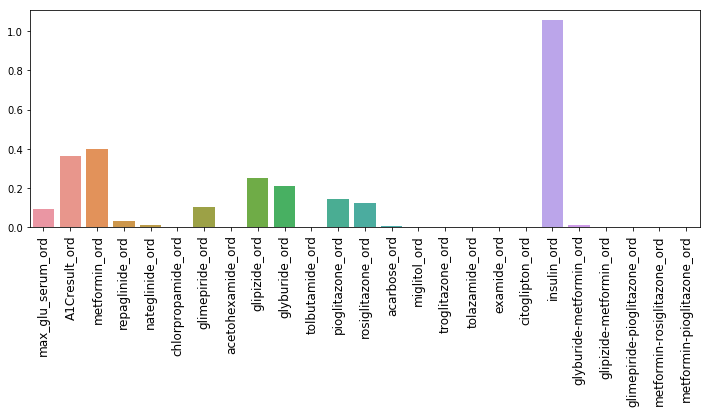

In [39]:
fig = plt.figure(figsize=(12,4))
ax = sns.barplot(data=meds/len(dataIn))
plt.xticks(rotation=90, fontsize=12)
plt.show()

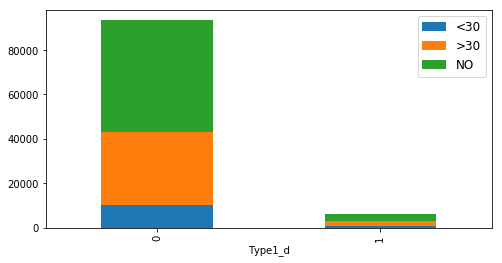

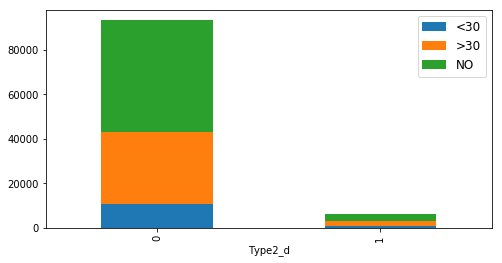

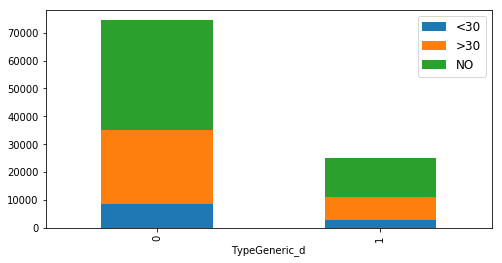

In [40]:
#Diabetes Types
for col in diab_types:
    pivot_tab = dataIn.pivot_table(index=col, columns='readmitted', values='encounter_id', aggfunc='count')
    pivot_tab.plot.bar(stacked=True, figsize=(8,4)).legend(prop={'size':12})

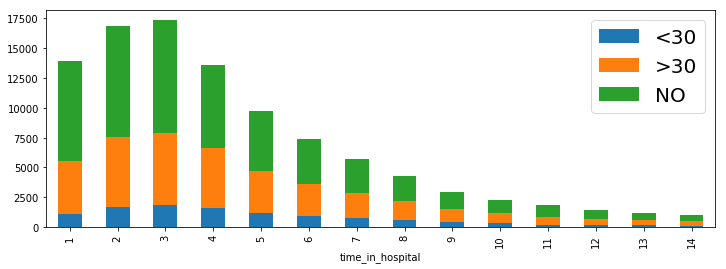

In [41]:
#time in hospital

pivot_tab = dataIn.pivot_table(index='time_in_hospital', columns='readmitted', values='encounter_id', aggfunc='count')
pivot_tab.plot.bar(stacked=True, figsize=(12,4)).legend(loc=1, prop={'size':20});

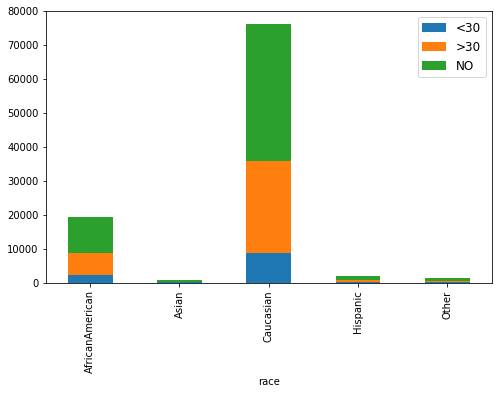

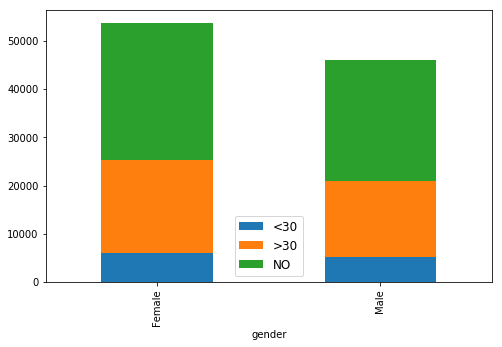

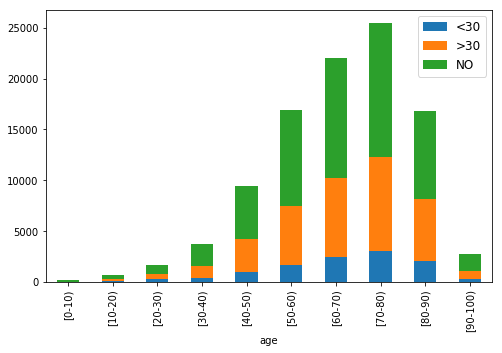

In [42]:
demographics = ['race','gender','age']

def visual_demographics():
    '''
    Plot stacked bar charts to visualize readmission rate of groups with different demographic features
    '''
    for col in demographics:
        pivot_tab = dataIn.pivot_table(index=col, columns='readmitted', values='encounter_id', aggfunc='count')
        pivot_tab.plot.bar(stacked=True, figsize=(8,5)).legend(prop={'size':12})

visual_demographics()

### Deleting Outliers

In [43]:
dataIn[cont_cols].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000
mean,4.398454,43.072971,1.340540,16.026545,0.373357,0.201343,0.643107,7.439251
std,2.986972,19.695587,1.703686,8.119809,1.276805,0.939981,1.271370,1.926043
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


Notes: We tried computing hat matrix to identify outliers in the data but given the scope of this dataset, it is extremely computationally expensive. Thus, we decided to proceed with another method by deleting observations with one of the continuous features valued more than 3 times interquartile range above the feature's 75th percentile.

In [ ]:
# %%time
## Hat matrix calculations to identify outliers
# saved_data = dataIn
# n_rows = len(dataIn)

# dataIn_cont = dataIn[cont_cols]

# hat_m = dataIn_cont(np.linalg.inv(dataIn_cont.T.dot(dataIn)).dot(dataIn_cont.T))
# hat_v = np.sum(hat_m **2,0)

# plt.scatter(range(len(hat_v)), hat_v, s=1000*hat_v, alpha=0.6)

# # find observations whose hat values exceed 2 times the average
# vindex = np.where(hat_v > 2*np.mean(hat_v))
# print(vindex[0])

# dataIn.drop(vindex[0], inplace = True)

# print("Removed " + str(n_rows - len(dataIn)) + " rows")

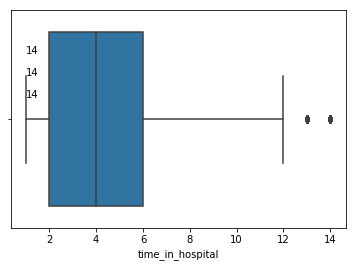

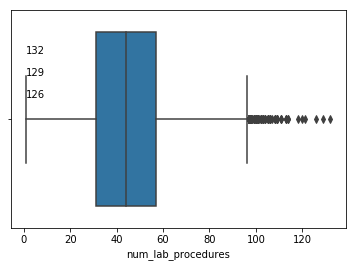

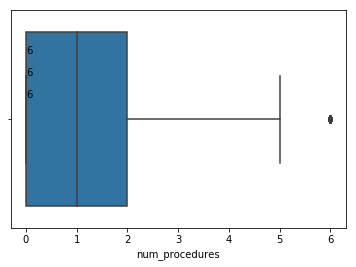

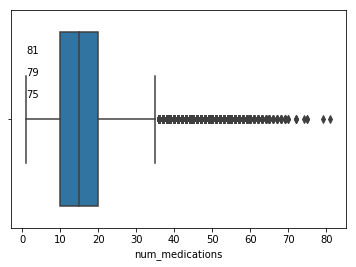

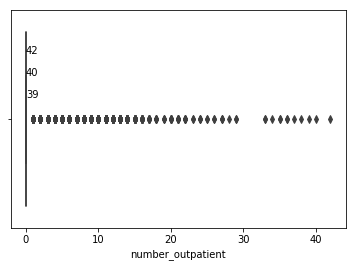

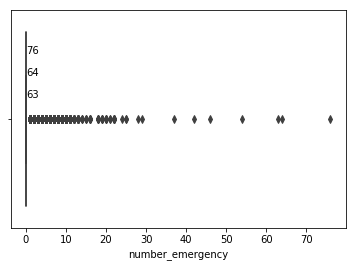

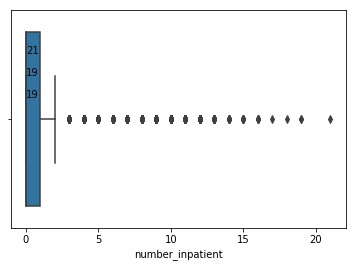

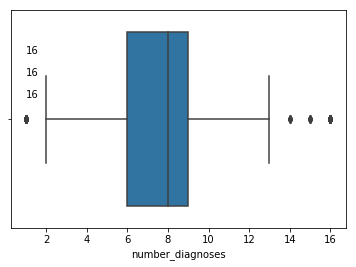

In [44]:
def visual_continious_cols():
    '''
    This function visualizes Box-and-whisker plots for continuous variables
    '''
    for i in cont_cols:
        sns.boxplot(dataIn[i])

        # Print the three highest values
        highest_vals = sorted(dataIn[i].tolist(),reverse=True)[:3]
        smallest_val = min(dataIn[i])
        
        plt.text(smallest_val, -0.3, highest_vals[0])
        plt.text(smallest_val, -0.2, highest_vals[1])
        plt.text(smallest_val, -0.1, highest_vals[2])

        plt.show()
        
visual_continious_cols()

In [45]:
saved_data = dataIn
n_rows = len(dataIn)

# Delete observations with one of the following features valued more than 3*IQR above 75th percentile
# For continuous features with non-zero median
cols = set(cont_cols) - set(['number_outpatient', 'number_emergency', 'number_inpatient'])

for col in cols:
    cutoff = 3*np.subtract(*np.percentile(saved_data[col], [75, 25])) + np.percentile(saved_data[col], 75)
    dataIn = dataIn[(dataIn[col]) < cutoff]
    
print("Removed " + str(n_rows - len(dataIn)) + " rows")

Removed 471 rows


### Dealing with skewness in continuous variables

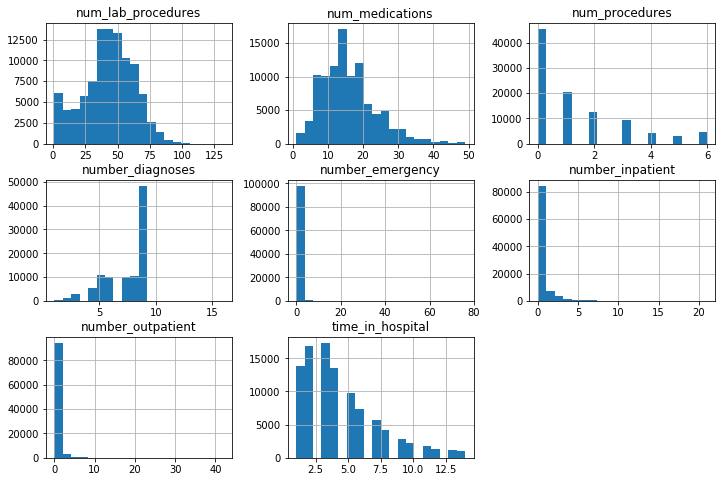

In [46]:
dataIn[cont_cols].hist(bins=20,figsize=(12,8));

In [47]:
cont_cols_boxcox = []
for col in cont_cols:
    col_new = col + '_boxcox'
    cont_cols_boxcox.append(col_new)
    # add 1 to variables with value 0 (cannot box-cox tranform non-positive values)
    if dataIn[col].min() == 0:
        dataIn[col_new], _ = stats.boxcox(dataIn[col]+1)
    else:
        dataIn[col_new], _ = stats.boxcox(dataIn[col])

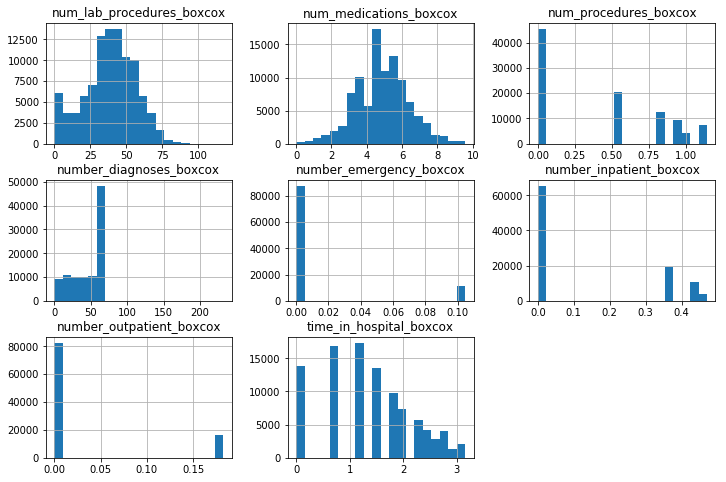

In [48]:
dataIn[cont_cols_boxcox].hist(bins=20,figsize=(12,8));

### Reviewing co-correlations

In [49]:
input_features = ['Type1_d','Type2_d','TypeGeneric_d','time_in_hospital_boxcox','num_lab_procedures_boxcox'
,'num_procedures_boxcox','num_medications_boxcox','number_outpatient_boxcox','number_emergency_boxcox'
,'number_inpatient_boxcox','number_diagnoses_boxcox','is_male','Infect_Paras_d','Neoplasm_d'
,'Endo_Nutri_Immun_d','Blood_d','Mental_d','Nervous_d','Circulatory_d','Respiratory_d','Digestive_d'
,'Genitourinary','Pregnancy_d','Skin_d','Muscu_Connective_d','Congentinal_d','Ill_Defined_d'
,'Injury_d','Supplementary_d','race_Asian','race_Caucasian'
,'race_Hispanic','race_Other','max_glu_serum_ord','A1Cresult_ord','metformin_ord','repaglinide_ord'
,'nateglinide_ord','chlorpropamide_ord','glimepiride_ord','acetohexamide_ord','glipizide_ord'
,'glyburide_ord','tolbutamide_ord','pioglitazone_ord','rosiglitazone_ord','acarbose_ord','miglitol_ord'
,'troglitazone_ord','tolazamide_ord','insulin_ord','glyburide-metformin_ord'
,'glipizide-metformin_ord','glimepiride-pioglitazone_ord'
,'metformin-pioglitazone_ord','age_ord','change_bin','diabetesMed_bin'
,'admission_type_id_2','admission_type_id_3','admission_type_id_4','admission_type_id_5'
,'admission_type_id_6','admission_type_id_7','admission_type_id_8'
,'discharge_disposition_id_2','discharge_disposition_id_3'
,'discharge_disposition_id_4','discharge_disposition_id_5'
,'discharge_disposition_id_6','discharge_disposition_id_7'
,'discharge_disposition_id_8','discharge_disposition_id_9'
,'discharge_disposition_id_10','discharge_disposition_id_11'
,'discharge_disposition_id_12','discharge_disposition_id_13'
,'discharge_disposition_id_14','discharge_disposition_id_15'
,'discharge_disposition_id_16','discharge_disposition_id_17'
,'discharge_disposition_id_18','discharge_disposition_id_19'
,'discharge_disposition_id_20','discharge_disposition_id_22'
,'discharge_disposition_id_23','discharge_disposition_id_24'
,'discharge_disposition_id_25','discharge_disposition_id_27'
,'discharge_disposition_id_28'
,'admission_source_id_2','admission_source_id_3','admission_source_id_4','admission_source_id_5'
,'admission_source_id_6','admission_source_id_7','admission_source_id_8','admission_source_id_9'
,'admission_source_id_10','admission_source_id_11','admission_source_id_13','admission_source_id_14'
,'admission_source_id_17','admission_source_id_20','admission_source_id_22','admission_source_id_25'
# excluded the following columns with only one single value
#'Perinatal_d','External_d','examide_ord','citoglipton_ord','metformin-rosiglitazone_ord' 
]

##### Version 2 of Input Features 
We decided not to use this version of feature engineering.

In [ ]:
input_features = ['Type1_d','Type2_d','TypeGeneric_d','time_in_hospital_boxcox','num_lab_procedures_boxcox'
,'num_procedures_boxcox','num_medications_boxcox','number_outpatient_boxcox','number_emergency_boxcox'
,'number_inpatient_boxcox','number_diagnoses_boxcox','is_male','change_bin','diabetesMed_bin'
,'diag_1_abbrv_Infect_Paras_d','diag_1_abbrv_Neoplasm_d','diag_1_abbrv_Endo_Nutri_Immun_d'
,'diag_1_abbrv_Blood_d','diag_1_abbrv_Mental_d','diag_1_abbrv_Nervous_d','diag_1_abbrv_Circulatory_d'
,'diag_1_abbrv_Respiratory_d','diag_1_abbrv_Digestive_d','diag_1_abbrv_Genitourinary'
,'diag_1_abbrv_Pregnancy_d','diag_1_abbrv_Skin_d','diag_1_abbrv_Muscu_Connective_d','diag_1_abbrv_Congentinal_d'
,'diag_1_abbrv_Ill_Defined_d','diag_1_abbrv_Injury_d','diag_1_abbrv_Supplementary_d','diag_2_abbrv_Infect_Paras_d'
,'diag_2_abbrv_Neoplasm_d','diag_2_abbrv_Endo_Nutri_Immun_d','diag_2_abbrv_Blood_d','diag_2_abbrv_Mental_d'
,'diag_2_abbrv_Nervous_d','diag_2_abbrv_Circulatory_d','diag_2_abbrv_Respiratory_d','diag_2_abbrv_Digestive_d'
,'diag_2_abbrv_Genitourinary','diag_2_abbrv_Pregnancy_d','diag_2_abbrv_Skin_d','diag_2_abbrv_Muscu_Connective_d'
,'diag_2_abbrv_Congentinal_d','diag_2_abbrv_Ill_Defined_d','diag_2_abbrv_Injury_d','diag_2_abbrv_Supplementary_d'
,'diag_3_abbrv_Infect_Paras_d','diag_3_abbrv_Neoplasm_d','diag_3_abbrv_Endo_Nutri_Immun_d','diag_3_abbrv_Blood_d'
,'diag_3_abbrv_Mental_d','diag_3_abbrv_Nervous_d','diag_3_abbrv_Circulatory_d','diag_3_abbrv_Respiratory_d'
,'diag_3_abbrv_Digestive_d','diag_3_abbrv_Genitourinary','diag_3_abbrv_Pregnancy_d','diag_3_abbrv_Skin_d'
,'diag_3_abbrv_Muscu_Connective_d','diag_3_abbrv_Congentinal_d','diag_3_abbrv_Ill_Defined_d'
,'diag_3_abbrv_Injury_d','diag_3_abbrv_Supplementary_d'
,'admission_type_id_2','admission_type_id_3','admission_type_id_4','admission_type_id_5','admission_type_id_6'
,'admission_type_id_7','admission_type_id_8','discharge_disposition_id_2','discharge_disposition_id_3'
,'discharge_disposition_id_4','discharge_disposition_id_5','discharge_disposition_id_6'
,'discharge_disposition_id_7','discharge_disposition_id_8','discharge_disposition_id_9'
,'discharge_disposition_id_10','discharge_disposition_id_11','discharge_disposition_id_12'
,'discharge_disposition_id_13','discharge_disposition_id_14','discharge_disposition_id_15'
,'discharge_disposition_id_16','discharge_disposition_id_17','discharge_disposition_id_18'
,'discharge_disposition_id_19','discharge_disposition_id_20','discharge_disposition_id_22'
,'discharge_disposition_id_23','discharge_disposition_id_24','discharge_disposition_id_25'
,'discharge_disposition_id_27','discharge_disposition_id_28'
,'admission_source_id_2','admission_source_id_3','admission_source_id_4'
,'admission_source_id_5','admission_source_id_6','admission_source_id_7'
,'admission_source_id_8','admission_source_id_9','admission_source_id_10'
,'admission_source_id_11','admission_source_id_13','admission_source_id_14'
,'admission_source_id_17','admission_source_id_20','admission_source_id_22'
,'admission_source_id_25'
,'race_Asian','race_Caucasian','race_Hispanic','race_Other'
,'max_glu_serum_>300','max_glu_serum_None','max_glu_serum_Norm'
,'A1Cresult_>8','A1Cresult_None','A1Cresult_Norm','metformin_No','metformin_Steady','metformin_Up'
,'repaglinide_No','repaglinide_Steady','repaglinide_Up','nateglinide_No','nateglinide_Steady'
,'nateglinide_Up','chlorpropamide_No','chlorpropamide_Steady','chlorpropamide_Up','glimepiride_No'
,'glimepiride_Steady','glimepiride_Up','acetohexamide_Steady','glipizide_No','glipizide_Steady'
,'glipizide_Up','glyburide_No','glyburide_Steady','glyburide_Up','tolbutamide_Steady','pioglitazone_No'
,'pioglitazone_Steady','pioglitazone_Up','rosiglitazone_No','rosiglitazone_Steady','rosiglitazone_Up'
,'acarbose_No','acarbose_Steady','acarbose_Up','miglitol_No','miglitol_Steady','miglitol_Up'
,'troglitazone_Steady','tolazamide_Steady','tolazamide_Up','insulin_No','insulin_Steady','insulin_Up'
,'glyburide-metformin_No','glyburide-metformin_Steady','glyburide-metformin_Up','glipizide-metformin_Steady'
,'glimepiride-pioglitazone_Steady','metformin-pioglitazone_Steady'
,'age_[10-20)','age_[20-30)','age_[30-40)','age_[40-50)','age_[50-60)','age_[60-70)','age_[70-80)'
,'age_[80-90)','age_[90-100)']

In [50]:
sns.set(font_scale=3)

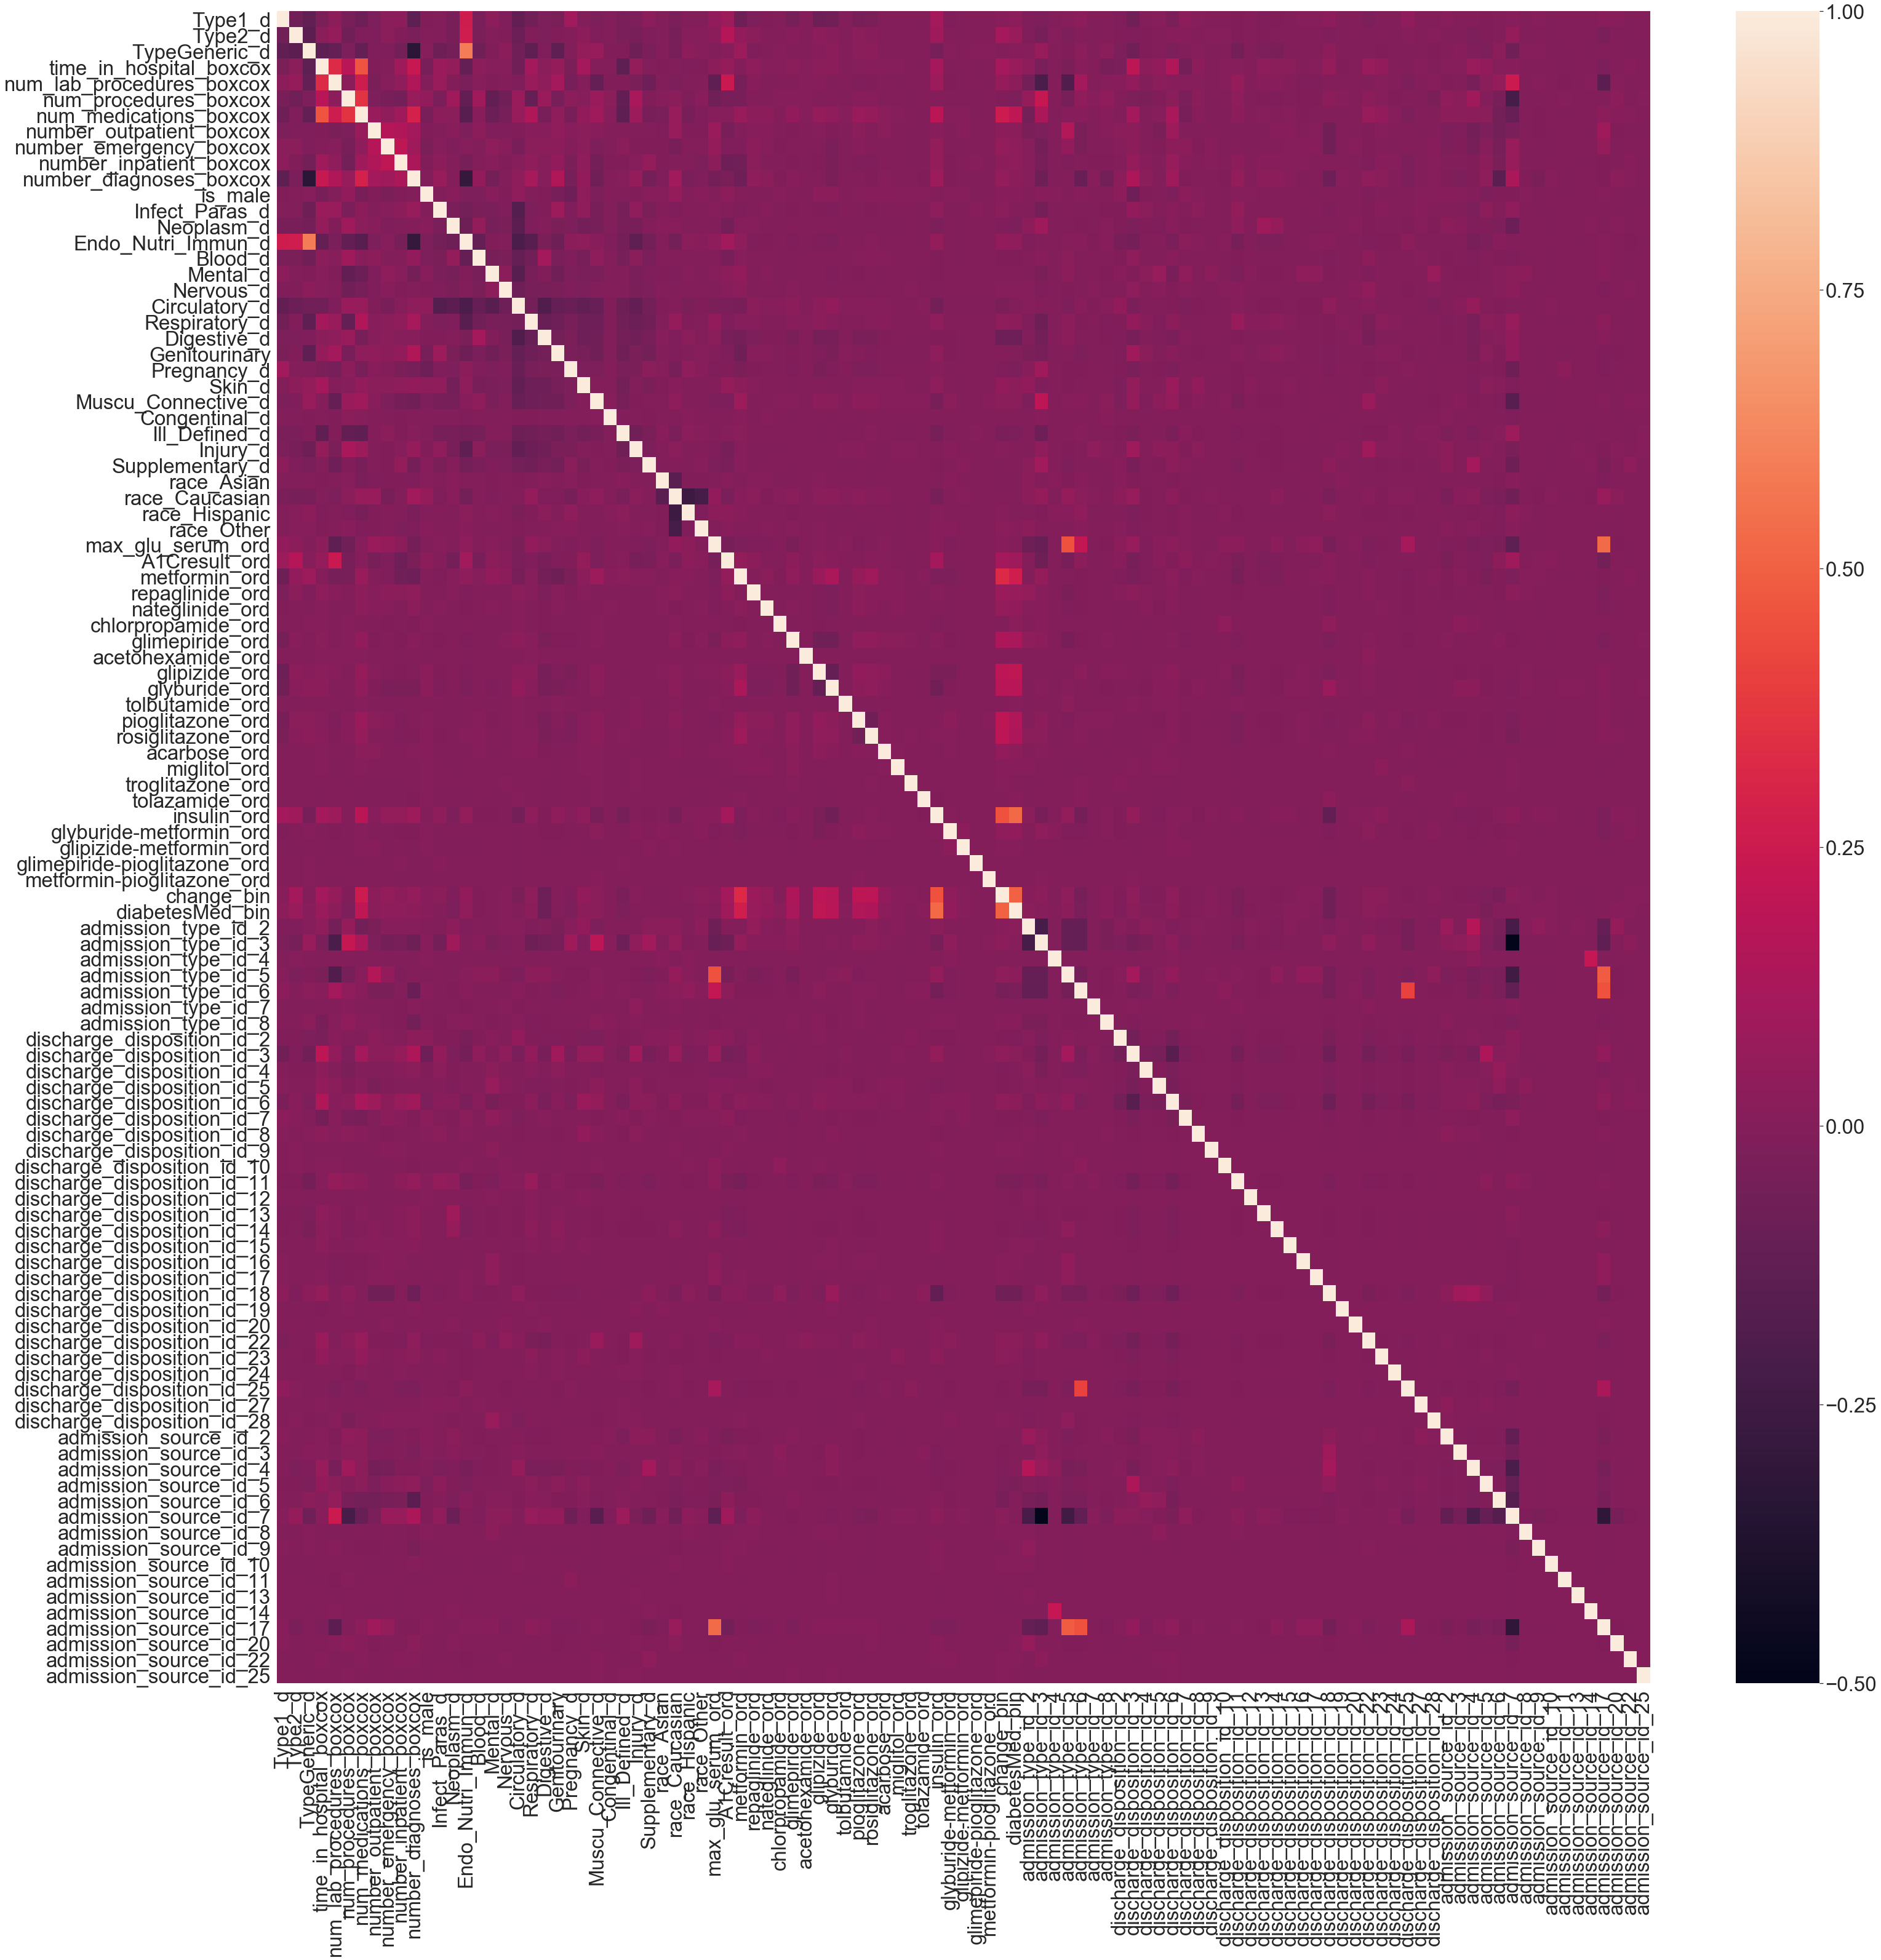

In [51]:
# feature correlation heatmap
fig = plt.figure(figsize=(50,50))
ax = fig.add_subplot(1,1,1)
correlation = dataIn[input_features].corr()

sns.heatmap(correlation, ax=ax,
        xticklabels=correlation.columns,
        yticklabels=correlation.columns)
plt.show()

In [52]:
pd.options.display.max_rows = 150
dataIn[input_features].head(2).T

,0,1
Type1_d,1,1
Type2_d,0,0
TypeGeneric_d,0,0
time_in_hospital_boxcox,0,1.18276
num_lab_procedures_boxcox,37.0018,53.1462
num_procedures_boxcox,0,0
num_medications_boxcox,0,5.53258
number_outpatient_boxcox,0,0
number_emergency_boxcox,0,0
number_inpatient_boxcox,0,0


In [53]:
#Review co-correlations using VIF
X = dataIn[input_features].values

X = X.astype(float)

vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print(vif)


[1.6280707362647249, 1.5850574953754528, 3.3008432252084865, 6.016601280408952, 8.247972542730173, 2.8268300266986435, 20.015894914073762, 1.3325043311749603, 1.2525600974099798, 1.6973037437578706, 7.780783561128979, 1.8933176142460908, 1.1634245507602994, 1.2170391953981075, 5.349002139422707, 1.15663317645462, 1.1740884560800278, 1.086750864099728, 3.8409783475058923, 1.6909784167450272, 1.3879473503133022, 1.4535409322620558, 1.0678392210537664, 1.2231420340842898, 1.2617076729941705, 1.0054177943625462, 1.3171677872219347, 1.3039010380675946, 1.151853986738294, 1.0412440439572954, 5.285273019341041, 1.1141877157824893, 1.0849388936072064, 1.6605873558898423, 1.3489425995890667, 1.6153630857096628, 1.0502245837822481, 1.0207115391394772, 1.0088620579184624, 1.1597854217435455, 1.0007020075528383, 1.4053373825701734, 1.3889397509924737, 1.0018393792967277, 1.19158750191031, 1.161946577741357, 1.0086645346962766, 1.0026664994636811, 1.001124558832515, 1.0032617453145567, 3.9041631463

In [54]:
for f, v in zip(input_features, vif):
    print(f, ":", v)

Type1_d : 1.6280707362647249
Type2_d : 1.5850574953754528
TypeGeneric_d : 3.3008432252084865
time_in_hospital_boxcox : 6.016601280408952
num_lab_procedures_boxcox : 8.247972542730173
num_procedures_boxcox : 2.8268300266986435
num_medications_boxcox : 20.015894914073762
number_outpatient_boxcox : 1.3325043311749603
number_emergency_boxcox : 1.2525600974099798
number_inpatient_boxcox : 1.6973037437578706
number_diagnoses_boxcox : 7.780783561128979
is_male : 1.8933176142460908
Infect_Paras_d : 1.1634245507602994
Neoplasm_d : 1.2170391953981075
Endo_Nutri_Immun_d : 5.349002139422707
Blood_d : 1.15663317645462
Mental_d : 1.1740884560800278
Nervous_d : 1.086750864099728
Circulatory_d : 3.8409783475058923
Respiratory_d : 1.6909784167450272
Digestive_d : 1.3879473503133022
Genitourinary : 1.4535409322620558
Pregnancy_d : 1.0678392210537664
Skin_d : 1.2231420340842898
Muscu_Connective_d : 1.2617076729941705
Congentinal_d : 1.0054177943625462
Ill_Defined_d : 1.3171677872219347
Injury_d : 1.30390

#### Takeaways/Questions to answer: 
There do not seem to be many variables that are unreasonably co-correlated with the remainder of the features.  The ones with the largest VIF are number of medications (~20) and age (~18).  We want to keep these features regardless as we feel they will be relevant indicators to readmittance likelihood.  The number of medications is likely highly correlated due to the number of ordinal medication features included.

As a result, we won't remove any features right out, but rather allow regularization to handle any irrelevant features.

## Save cleaned data

In [55]:
dataIn.to_csv('./Dataset/cleaned_data.csv', index=False)

## Prepare train and test data

### Splitting to train/test data

In [56]:
# Load in cleaned data
cleaned_data = pd.read_csv('./Dataset/cleaned_data.csv')

In [57]:
# Keep only the input features
X = cleaned_data[input_features]

y = cleaned_data['readmitted_bin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)   #changed to 2

### Normalizing features

In [58]:
# Use MinMax scaler to normalize continuous and ordinal features
cont_cols_boxcox = ['time_in_hospital_boxcox', 'num_lab_procedures_boxcox', 'num_procedures_boxcox', 
                    'num_medications_boxcox', 'number_outpatient_boxcox', 'number_emergency_boxcox', 
                    'number_inpatient_boxcox', 'number_diagnoses_boxcox']
ord_cols_new = ['max_glu_serum_ord', 'A1Cresult_ord', 'metformin_ord', 'repaglinide_ord', 'nateglinide_ord', 
                'chlorpropamide_ord', 'glimepiride_ord', 'acetohexamide_ord', 'glipizide_ord', 'glyburide_ord', 
                'tolbutamide_ord', 'pioglitazone_ord', 'rosiglitazone_ord', 'acarbose_ord', 'miglitol_ord', 
                'troglitazone_ord', 'tolazamide_ord', 'insulin_ord', 'glyburide-metformin_ord', 
                'glipizide-metformin_ord', 'glimepiride-pioglitazone_ord', 'metformin-pioglitazone_ord']
scaler = MinMaxScaler()
X_train[cont_cols_boxcox + ord_cols_new] = scaler.fit_transform(X_train[cont_cols_boxcox + ord_cols_new])

# Apply the same scaler on test data
X_test[cont_cols_boxcox + ord_cols_new] = scaler.transform(X_test[cont_cols_boxcox + ord_cols_new])

##### Version 2 of Input Features
We decided not to use thie version of feature engineering.

In [ ]:
# Use MinMax scaler to normalize continuous features
cont_cols_boxcox = ['time_in_hospital_boxcox', 'num_lab_procedures_boxcox', 'num_procedures_boxcox', 
                    'num_medications_boxcox', 'number_outpatient_boxcox', 'number_emergency_boxcox', 
                    'number_inpatient_boxcox', 'number_diagnoses_boxcox']

scaler = MinMaxScaler()
X_train[cont_cols_boxcox] = scaler.fit_transform(X_train[cont_cols_boxcox])

# Apply the same scaler on test data
X_test[cont_cols_boxcox] = scaler.transform(X_test[cont_cols_boxcox])

### Balance Data

In [59]:
sum(y_train)/len(y_train) #Readmittance rate before resampling

0.11303272066249243

Data is imbalanced with a much larger porportion of patients who were not readmitted within 30 days. We want to balance the data before running models.

#### Downsampling majority class

In [60]:
Xy_train = pd.concat([X_train, y_train], axis=1, sort=False)

In [61]:
Xy_train['readmitted_bin'].value_counts()

0    70262
1     8954
Name: readmitted_bin, dtype: int64

In [62]:
# Separate majority and minority classes
Xy_train = pd.concat([X_train, y_train], axis=1, sort=False)
df_majority = Xy_train[Xy_train.readmitted_bin==0]
df_minority = Xy_train[Xy_train.readmitted_bin==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=df_minority.shape[0],     # to match minority class
                                 random_state=1) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.readmitted_bin.value_counts()

1    8954
0    8954
Name: readmitted_bin, dtype: int64

In [63]:
# Split X and y
y_train_down = df_downsampled.readmitted_bin
X_train_down = df_downsampled[input_features]

In [ ]:
X_train_down.shape

#### Oversampling minority class
Training models using the oversampled data (replicating those readmitted within 30 days) takes longer time and the performance is not necessarily better. Thus, we decided not to use this method of balancing data.

In [64]:
sm = SMOTE(random_state=1)
X_train, y_train = sm.fit_resample(X_train,y_train)

In [65]:
sum(y_train)/len(y_train) #Readmittance rate after resampling

0.5

In [66]:
X_train.shape

(140524, 106)

# Machine Learning Approaches

### Naive Bayes 

In [67]:
## Gaussian Naive Bayes
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train_down, y_train_down)

# Predict on test data
gNB_test_pred = gaussian_nb.predict(X_test)

## Measure test accuracy
gNB_test_acc = accuracy_score(y_test, gNB_test_pred)
print('Gaussian Naive Bayes classifier accuracy:', gNB_test_acc)

## Measure test recall
gNB_test_recall = recall_score(y_test, gNB_test_pred)
print('Gaussian Naive Bayes classifier recall:', gNB_test_recall)

## Measure test auc roc
gNB_test_rocauc = roc_auc_score(y_test, gNB_test_pred)
print('Gaussian Naive Bayes classifier auc roc:', gNB_test_rocauc)

Gaussian Naive Bayes classifier accuracy: 0.14859883867710175
Gaussian Naive Bayes classifier recall: 0.9787626962142197
Gaussian Naive Bayes classifier auc roc: 0.5127103350111294


In [68]:
## Multinomial Naive Bayes with Laplace smoothing
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train_down, y_train_down)

# Predict on test data
mNB_test_pred = multinomial_nb.predict(X_test)

## Measure test accuracy
mNB_test_acc = accuracy_score(y_test, mNB_test_pred)
print('Multinomial Naive Bayes classifier accuracy:', mNB_test_acc)

## Measure test recall
mNB_test_recall = recall_score(y_test, mNB_test_pred)
print('Multinomial Naive Bayes classifier recall:', mNB_test_recall)

## Measure test auc roc
mNB_test_rocauc = roc_auc_score(y_test, mNB_test_pred)
print('Multinomial Naive Bayes classifier auc roc:', mNB_test_rocauc)

Multinomial Naive Bayes classifier accuracy: 0.6254481191618279
Multinomial Naive Bayes classifier recall: 0.5960295475530932
Multinomial Naive Bayes classifier auc roc: 0.6125450759478716


##### Findings

The input features are mostly consisted of binary and multinomial features. Since there are only a few continuous features, Gaussian Naive Bayes does not work well with a very low accuracy score. The recall score is abnormally high because the classifier classifies a lot more instances as positive than it should be. On the other hand, Multinomial Naive Bayes classifier's performance is decent with an accuracy score of 0.63, a recall score of 0.60 and an AUC score of 0.61.

Performance using oversampled training data is slightly worse with AUC scores of 0.51 (Gaussian NB) and 0.60 (Multinomial NB).

### Logistic Regression

In [69]:
## Define the grid of logistic regression parameters
parameters = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]} #tried 200/300 but unnecessary as results
#basically the same for all Cs
model = LogisticRegression(solver='liblinear')


## Perform grid search CV to find best model parameter setting
cmodel = GridSearchCV(model, param_grid = parameters, 
                      scoring = 'roc_auc', cv = 5, return_train_score=True, n_jobs=-1, verbose=5)
cmodel.fit(X_train_down, y_train_down)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    4.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=5)

In [70]:
print(pd.DataFrame(cmodel.cv_results_)[['mean_train_score', 
                                       'mean_test_score', 
                                        'params']])

   mean_train_score  mean_test_score                        params
0          0.624133         0.622139  {'C': 0.01, 'penalty': 'l1'}
1          0.657639         0.651319  {'C': 0.01, 'penalty': 'l2'}
2          0.665252         0.659917   {'C': 0.1, 'penalty': 'l1'}
3          0.669094         0.661328   {'C': 0.1, 'penalty': 'l2'}
4          0.670755         0.662534     {'C': 1, 'penalty': 'l1'}
5          0.670912         0.662011     {'C': 1, 'penalty': 'l2'}
6          0.671162         0.661397    {'C': 10, 'penalty': 'l1'}
7          0.671137         0.661387    {'C': 10, 'penalty': 'l2'}
8          0.671141         0.661275   {'C': 100, 'penalty': 'l1'}
9          0.671138         0.661271   {'C': 100, 'penalty': 'l2'}


In [71]:
print(cmodel.best_score_)
print(cmodel.best_params_)
print(cmodel.best_estimator_)

0.6625342740384685
{'C': 1, 'penalty': 'l1'}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


In [72]:
bestC = cmodel.best_params_['C']
bestPen = cmodel.best_params_['penalty']
## Fit logistic regression with best parameters to the entire training data
log_reg_model = LogisticRegression(penalty = bestPen, C = bestC, solver = 'liblinear')

log_reg_model.fit(X_train_down, y_train_down)
logR_test_pred = log_reg_model.predict(X_test)

## Measure test accuracy
logR_test_acc = accuracy_score(y_test, logR_test_pred)

print('Logistic classifier accuracy:', logR_test_acc)

## Measure test recall
logR_test_recall = recall_score(y_test, logR_test_pred)

print('Logistic classifier recall:', logR_test_recall)

## Measure test auc roc
logR_test_rocauc = roc_auc_score(y_test, logR_test_pred)

print('Logistic classifier auc roc:', logR_test_rocauc)

Logistic classifier accuracy: 0.636101994445847
Logistic classifier recall: 0.6140350877192983
Logistic classifier auc roc: 0.6264234058699673


In [99]:
# Running logistic regression on the oversampled data outputs a lower AUC score (0.6112).

In [76]:
sns.set(font_scale=2)

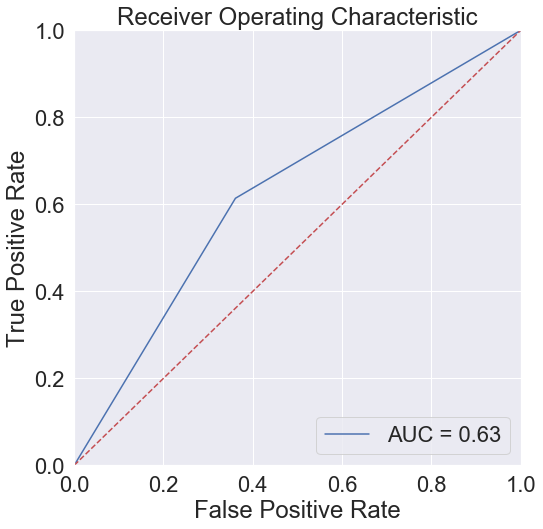

In [79]:
#from https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
# calculate the fpr and tpr for all thresholds of the classification
preds = log_reg_model.predict(X_test)

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [81]:
#to understand how much impact each feature has on admission.  Negative values
#indicates that having this feature increase DECREASES likelihood to readmit.
#Positive values indicates that increasing this feature will INCREASE likelihood to readmit.
weights = zip(input_features, log_reg_model.coef_.flatten())
sorted(weights, key = lambda t: t[1])

[('discharge_disposition_id_11', -5.007575085800145),
 ('discharge_disposition_id_13', -0.9540180577225317),
 ('admission_type_id_7', -0.8950993676634685),
 ('discharge_disposition_id_23', -0.6125525175291412),
 ('Pregnancy_d', -0.4479544643813203),
 ('discharge_disposition_id_14', -0.33413735134928907),
 ('metformin_ord', -0.2632607984593334),
 ('Muscu_Connective_d', -0.22007915516357202),
 ('discharge_disposition_id_25', -0.20676416294815766),
 ('admission_source_id_5', -0.19061466825720688),
 ('admission_source_id_2', -0.1881245667706839),
 ('admission_type_id_8', -0.17313770855747612),
 ('acarbose_ord', -0.1447059022715668),
 ('glimepiride_ord', -0.14168099717683053),
 ('admission_source_id_17', -0.13250208951681944),
 ('pioglitazone_ord', -0.12048655729288905),
 ('A1Cresult_ord', -0.11754242216438268),
 ('rosiglitazone_ord', -0.11739651256350259),
 ('admission_source_id_4', -0.10462967154779977),
 ('Infect_Paras_d', -0.09473193877411659),
 ('admission_source_id_6', -0.082668076462

In [ ]:
#scores before resampling: auc 0.66, 
#Logistic classifier accuracy: 0.8875031557687453
#Logistic classifier recall: 0.0017953321364452424
#Logistic classifier auc roc: 0.5007838810082009


#0.6627882973218983
#{'C': 1, 'penalty': 'l1'}
#LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='warn',
#          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
#          tol=0.0001, verbose=0, warm_start=False)

# AUC score for oversampling data: 0.6112


In [82]:
# Reduce X feature space to 2-dimension to be used to 
X_train_2d = TSNE(n_components=2).fit_transform(X_train_down)
X_test_2d = TSNE(n_components=2).fit_transform(X_test)

In [90]:
def plot_lg_decision_function(model, ax=None):
    """Plot the decision function for a 2D logistic regression"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [86]:
# Get a random sample of training data points
idx = np.random.randint(X_train_2d.shape[0], size=1000)
X_train_2d_sample = X_train_2d[idx, :]
y_train_down_sample = np.array(y_train_down)[idx]

# Get a random sample of training data points
idx_test = np.random.randint(X_train_2d.shape[0], size=1000)
X_test_2d_sample = X_test_2d[idx_test, :]
y_test_sample = np.array(y_test)[idx_test]

In [84]:
## Fit logistic regression model on 2d training data
log_reg_model_2d = LogisticRegression(penalty = bestPen, C = bestC, solver = 'liblinear')
log_reg_model_2d.fit(X_train_2d, y_train_down)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

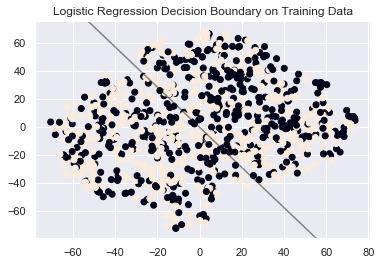

In [96]:
## Plotting the decision boundary of logistic regression model with the tuned hyperparameters
## on a sample of training data
sns.set(font_scale=1)
plt.scatter(X_train_2d_sample[:,0], X_train_2d_sample[:,1], 
            c=y_train_down_sample)
plot_lg_decision_function(log_reg_model_2d)
plt.title('Logistic Regression Decision Boundary on Training Data')
plt.show()

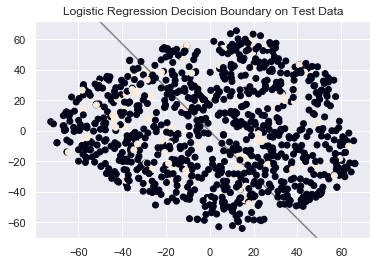

In [97]:
## Plotting the decision boundary of logistic regression model
## on a sample of test data
plt.scatter(X_test_2d_sample[:,0], X_test_2d_sample[:,1], c=y_test_sample)
plot_lg_decision_function(log_reg_model_2d)
plt.title('Logistic Regression Decision Boundary on Test Data')
plt.show()

##### Findings

The original logistic regression model had quite poor performance, particularly on recall and auc.  Once we resampled, the recall improved from .002 to 0.57 and auc improved from 0.50 to 0.60.  This verifies the importance of resampling our dataset

##### Top contributors to readmittance (non resampled):

Transfer from a hospital
Transfer from a critical access hospital
Discharged/transferred to another rehab fac including rehab units of a hospital
Having an Endrocine/Nutrional/Metabolic disease (typically diabetes) in top 3 diagnoses
Discharged/transferred to another short term hospital
Pregnancy-related
Taking/increase in diabetes med (glimepiride-pioglitazone/insulin/pioglitazone)
"other" race (e.g. not white, black, asian)
"expired" discharge
Discharge Still patient or expected to return for outpatient services
Blood-related disease
Normal pregnancy delivery
Number of emergency room visits.

##### Top contributors to readmittance (resampled):

Still patient or expected return.
Admitted as inpatient to hospital
Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital
Discharged/transferred to another rehab fac including rehab units of a hospital .
Discharged/transferred within this institution to Medicare approved swing bed
number impatient
number diagnoses

#### For some reason was getting these before, now very different (above) Discuss
Number of medications
Transfer from a hospital
Transfer from a critical access hospital
Having an Endrocine/Nutrional/Metabolic disease (typically diabetes) in top 3 diagnoses
Discharged/transferred to another rehab fac including rehab units of a hospital
Discharged/transferred to another short term hospital
Taking/increase in diabetes med (glimepiride-pioglitazone/insulin/pioglitazone)
Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
Pregnancy

### Support Vector Machine (SVM)

In [98]:
#Cross-validation to find the best kernel and hyperparameters
svc = SVC()
param_grid = [{'kernel': ['linear'], 'C': [1, 10]},
               {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]}]
    
svm_grid = GridSearchCV(svc, param_grid, scoring = 'roc_auc', cv = 5, verbose=10, n_jobs=-1)
svm_grid.fit(X_train_down,y_train_down)

print(svm_grid.best_score_)
print(svm_grid.best_params_)
print(svm_grid.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  8.7min remaining:  5.0min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 10.1min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 11.4min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.5min finished


0.6671203857894037
{'C': 10, 'kernel': 'linear'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [100]:
print(pd.DataFrame(svm_grid.cv_results_)[['mean_train_score', 
                                       'mean_test_score', 
                                        'params']])

   mean_train_score  mean_test_score  \
0          0.669159         0.663732   
1          0.672602         0.667120   
2          0.652518         0.648612   
3          0.583363         0.581630   
4          0.668946         0.660843   
5          0.652643         0.648883   

                                        params  
0                 {'C': 1, 'kernel': 'linear'}  
1                {'C': 10, 'kernel': 'linear'}  
2    {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}  
3   {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}  
4   {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}  
5  {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}  


In [101]:
bestKernel = svm_grid.best_params_['kernel']
bestC = svm_grid.best_params_['C']
if bestKernel == 'rbf':
    bestGamma = svm_grid.best_params_['gamma']
    svm_model = SVC(C=bestC, kernel=bestKernel, gamma=bestGamma)
else:
    svm_model = SVC(C=bestC, kernel=bestKernel)
svm_model.fit(X_train_down, y_train_down)

## Predict on the test data
svm_test_pred = svm_model.predict(X_test)

## Measure test accuracy
svm_test_acc = accuracy_score(y_test, svm_test_pred)
print('SVM classifier accuracy:', svm_test_acc)

## Measure test recall
svm_test_recall = recall_score(y_test, svm_test_pred)
print('SVM classifier recall:', svm_test_recall)

## Measure test auc roc
svm_test_rocauc = roc_auc_score(y_test, svm_test_pred)
print('SVM classifier auc roc:', svm_test_rocauc)

SVM classifier accuracy: 0.6606917445089624
SVM classifier recall: 0.5549399815327793
SVM classifier auc roc: 0.6143088138289216


In [102]:
# Get a random sample of training data points
idx = np.random.randint(X_train_2d.shape[0], size=1000)
X_train_2d_sample = X_train_2d[idx, :]
y_train_down_sample = np.array(y_train_down)[idx]

# Get a random sample of training data points
idx_test = np.random.randint(X_train_2d.shape[0], size=1000)
X_test_2d_sample = X_test_2d[idx_test, :]
y_test_sample = np.array(y_test)[idx_test]

In [104]:
svm_model_2d = SVC(C=10, kernel='linear')
svm_model_2d.fit(X_train_2d, y_train_down)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [105]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=3, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

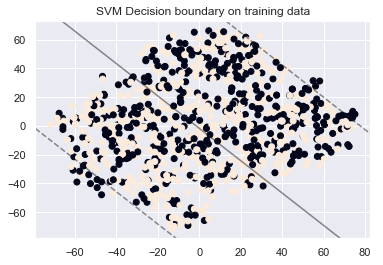

In [106]:
## Plotting the decision boundary of SVM model with the tuned hyperparameters
## on a sample of training data

plt.scatter(X_train_2d_sample[:,0], X_train_2d_sample[:,1], 
            c=y_train_down_sample)
plot_svc_decision_function(svm_model_2d)
plt.title('SVM Decision boundary on training data')
plt.show()

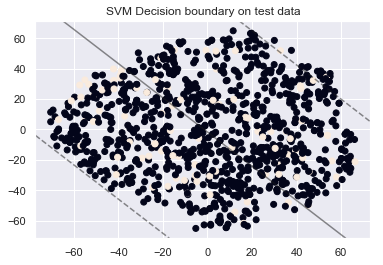

In [107]:
## Plotting the decision boundary of SVM model with the tuned hyperparameters
## on test data

plt.scatter(X_test_2d_sample[:,0], X_test_2d_sample[:,1], c=y_test_sample)
plot_svc_decision_function(svm_model_2d)
plt.title('SVM Decision boundary on test data')
plt.show()

In [108]:
## Fit training data using the second best set of hyperparameters
svm_model_rbf = SVC(C=10, gamma=0.001, kernel='rbf')
svm_model_rbf.fit(X_train_down, y_train_down)

## Predict on the test data
rbf_svm_test_pred = svm_model_rbf.predict(X_test)

## Measure test accuracy
svm_test_acc = accuracy_score(y_test, rbf_svm_test_pred)
print('SVM classifier accuracy:', svm_test_acc)

## Measure test recall
svm_test_recall = recall_score(y_test, rbf_svm_test_pred)
print('SVM classifier recall:', svm_test_recall)

## Measure test auc roc
svm_test_rocauc = roc_auc_score(y_test, rbf_svm_test_pred)
print('SVM classifier auc roc:', svm_test_rocauc)

SVM classifier accuracy: 0.6654885130017673
SVM classifier recall: 0.5364727608494921
SVM classifier auc roc: 0.6089019510353249


In [109]:
## Fit non-linear SVM model on 2d training data
svm_model_rbf.fit(X_train_2d, y_train_down)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

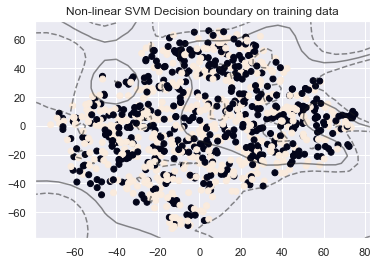

In [110]:
## Plotting the decision boundary of a non-linear SVM model
## on a sample of training data

plt.scatter(X_train_2d_sample[:,0], X_train_2d_sample[:,1], c=y_train_down_sample)
plot_svc_decision_function(svm_model_rbf)
plt.title('Non-linear SVM Decision boundary on training data')
plt.show()

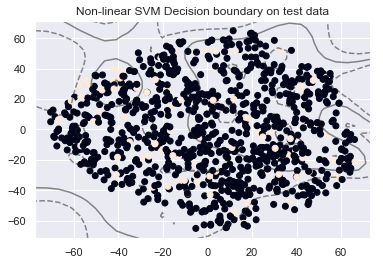

In [111]:
## Plotting the decision boundary of a non-linear SVM model
## on a sample of test data

plt.scatter(X_test_2d_sample[:,0], X_test_2d_sample[:,1], c=y_test_sample)
plot_svc_decision_function(svm_model_rbf)
plt.title('Non-linear SVM Decision boundary on test data')
plt.show()

In [ ]:
# Use SGD as a proxy for linear SVM on oversampled data
# classifier accuracy: 0.6639232517041151
# classifier recall: 0.5397045244690674
# classifier auc roc: 0.6094406742760325

# Use rbf SVC on partial oversampled data (randomly select 40,000 data points)
# classifier accuracy: 0.6699823276950265
# classifier recall: 0.5332409972299169
# classifier auc roc: 0.6100073119263707

##### Findings
The best-tuned SVM model is a linear classifier which achieves an AUC score of 0.614. The second best SVM model among the cross-validated ones uses rbf as the kernel and achieves an AUC score of 0.609.

We visualized the decision boundaries by reducing the data to 2D using TSNE. However, negative and positive data points in 2D are mostly overlapping with each other. The linear SVM decision boundary looks more like a random guess. The non-linear boundary is trying to carve out the areas but it is hard to tell if it does a good job or not.

### Decision Tree

In [112]:
parameters = {'max_depth':np.linspace(1, 10, 10)}
tree = DecisionTreeClassifier(random_state=1)
tree_grid = GridSearchCV(tree, parameters, cv = 5, verbose=5, n_jobs = -1, scoring='roc_auc')
tree_grid.fit(X_train_down, y_train_down)
print('Best depth parameter of the tree: {:.0f}'.format(tree_grid.best_params_['max_depth']))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.8s


Best depth parameter of the tree: 6


[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    3.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.8s finished


In [113]:
print(pd.DataFrame(tree_grid.cv_results_)[['mean_train_score', 
                                      'std_train_score', 'mean_test_score', 
                                        'std_test_score', 'params']])

   mean_train_score  std_train_score  mean_test_score  std_test_score  \
0          0.583468         0.008430         0.581360        0.011355   
1          0.606238         0.011217         0.603891        0.014021   
2          0.629507         0.005065         0.628065        0.007450   
3          0.643268         0.003990         0.641189        0.005431   
4          0.655085         0.002532         0.646195        0.009168   
5          0.665205         0.001251         0.647241        0.006430   
6          0.676181         0.001358         0.646429        0.006209   
7          0.690095         0.001947         0.641765        0.005862   
8          0.705573         0.002603         0.636940        0.006527   
9          0.724414         0.003844         0.629151        0.006419   

                params  
0   {'max_depth': 1.0}  
1   {'max_depth': 2.0}  
2   {'max_depth': 3.0}  
3   {'max_depth': 4.0}  
4   {'max_depth': 5.0}  
5   {'max_depth': 6.0}  
6   {'max_depth': 7.0

In [114]:
print('Best roc auc score: {:0.4f}'.format(tree_grid.best_score_))

Best roc auc score: 0.6472


In [115]:
tree = DecisionTreeClassifier(max_depth=tree_grid.best_params_['max_depth'],
                              random_state=1)
tree.fit(X_train_down, y_train_down)

tree_test_pred = tree.predict(X_test)

## Measure test accuracy
tree_test_acc = accuracy_score(y_test, tree_test_pred)
print('Decision Tree classifier accuracy:', tree_test_acc)


## Measure test recall
tree_test_rec = recall_score(y_test, tree_test_pred)
print('Decision Tree classifier recall:', tree_test_rec)


## Measure test  auc roc
tree_test_rocauc = roc_auc_score(y_test, tree_test_pred)
print('Decision Tree classifier auc roc:', tree_test_rocauc)

Decision Tree classifier accuracy: 0.6096945215854582
Decision Tree classifier recall: 0.6251154201292706
Decision Tree classifier auc roc: 0.6164581579358298


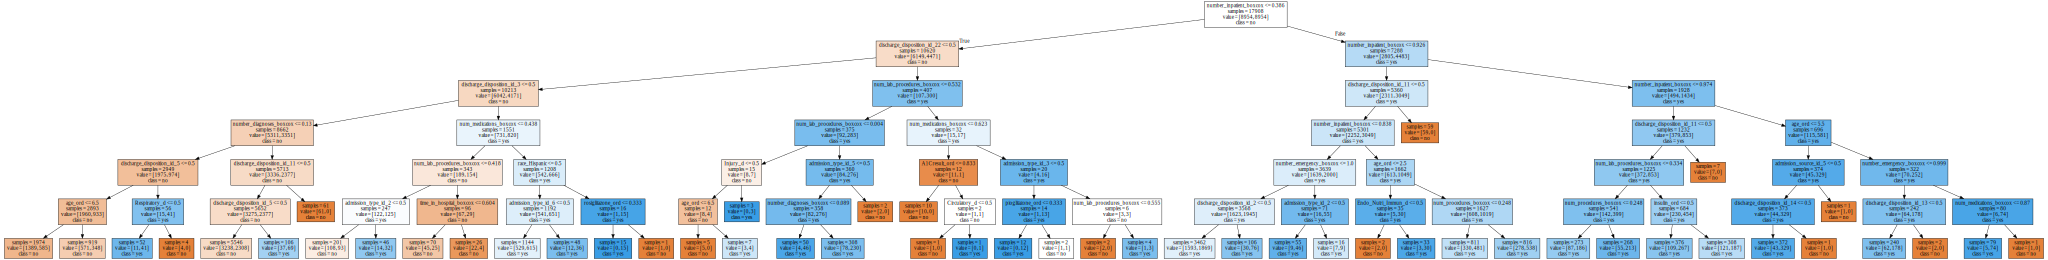

In [116]:
export_graphviz(tree, out_file="tree.dot", class_names=['no', 'yes'],
                feature_names=input_features, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
## Decision tree on oversampled data
#classifier accuracy: 0.8824539257763191
#classifier recall: 0.08448753462603878
#classifier auc roc: 0.5324643013568995

### Random Forest

In [117]:
parameters = {'max_depth':[1,3,5,8,10],
              'n_estimators':[2,5,10,15,20,30,40,50]}
forest = RandomForestClassifier(random_state=1)
forest_grid = GridSearchCV(forest, parameters, cv = 5, verbose=5, n_jobs = -1, scoring='roc_auc')
forest_grid.fit(X_train_down, y_train_down)
print('Best depth parameter of the forest: {:.0f}'.format(forest_grid.best_params_['max_depth']))
print('Best estimator parameter of the forest: {:.0f}'.format(forest_grid.best_params_['n_estimators']))
print('Best roc auc score: {:0.4f}'.format(forest_grid.best_score_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    7.7s finished


Best depth parameter of the forest: 10
Best estimator parameter of the forest: 50
Best roc auc score: 0.6687


In [118]:
print(pd.DataFrame(forest_grid.cv_results_)[['mean_train_score','mean_test_score','params']])

    mean_train_score  mean_test_score                                 params
0           0.526005         0.526549    {'max_depth': 1, 'n_estimators': 2}
1           0.559720         0.557019    {'max_depth': 1, 'n_estimators': 5}
2           0.615986         0.614611   {'max_depth': 1, 'n_estimators': 10}
3           0.620074         0.618057   {'max_depth': 1, 'n_estimators': 15}
4           0.641840         0.637252   {'max_depth': 1, 'n_estimators': 20}
5           0.645175         0.640805   {'max_depth': 1, 'n_estimators': 30}
6           0.651847         0.646930   {'max_depth': 1, 'n_estimators': 40}
7           0.649817         0.644734   {'max_depth': 1, 'n_estimators': 50}
8           0.567425         0.562387    {'max_depth': 3, 'n_estimators': 2}
9           0.645983         0.639273    {'max_depth': 3, 'n_estimators': 5}
10          0.653691         0.646687   {'max_depth': 3, 'n_estimators': 10}
11          0.658595         0.650317   {'max_depth': 3, 'n_estimators': 15}

In [119]:
forest = RandomForestClassifier(max_depth=forest_grid.best_params_['max_depth'],
                              n_estimators=forest_grid.best_params_['n_estimators'] ,random_state=1)
forest.fit(X_train_down, y_train_down)

rf_test_pred = forest.predict(X_test)

## Measure test accuracy
rf_test_acc = accuracy_score(y_test, rf_test_pred)
print('Random Forest classifier accuracy:', rf_test_acc)


## Measure test recall
rf_test_rec = recall_score(y_test, rf_test_pred)
print('Random Forest recall:', rf_test_rec)


## Measure test  auc roc
rf_test_rocauc = roc_auc_score(y_test, rf_test_pred)
print('Random Forest auc roc:', rf_test_rocauc)


Random Forest classifier accuracy: 0.6540772532188841
Random Forest recall: 0.5844875346260388
Random Forest auc roc: 0.6235550661394835


In [ ]:
## Random Forest on oversampled data
#accuracy: 0.88957334006564
#recall: 0.02077562326869806
#auc roc: 0.5085169572775261

#### Before making more features

Random Forest classifier accuracy: 0.6792224185811664
Random Forest recall: 0.40888689407540396
Random Forest auc roc: 0.5611880564704834

## Model Comparison

### ROC Curves

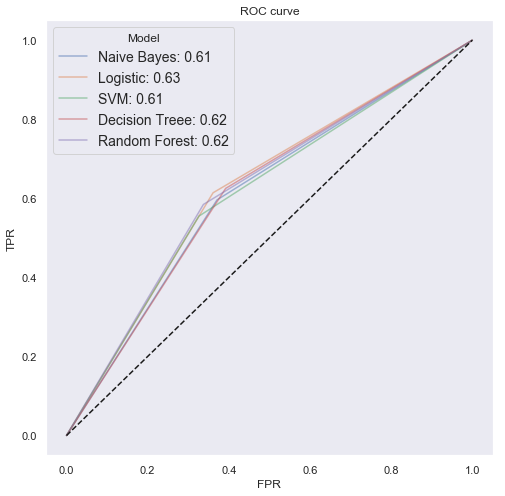

In [134]:
fig = plt.figure(figsize=(8,8))
models_pred = [mNB_test_pred, logR_test_pred, svm_test_pred, tree_test_pred, rf_test_pred]
models = ['Naive Bayes', 'Logistic', 'SVM', 'Decision Treee', 'Random Forest']
colors = ['C0', 'C1', 'C2', 'C3', 'C4']
#auc = [0] * len(models)

for i in range(len(models)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, models_pred[i], pos_label=1)
    auc = np.trapz(tpr, fpr)
    plt.plot(fpr, tpr, linestyle='-', alpha=0.5, color= colors[i], label = models[i]+(': %0.2f' % auc))

plt.plot([0, 1], [0, 1],'k--')
plt.legend(title = 'Model', loc = 'best', fontsize=14)   
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid();

### Confusion Matrix

In [122]:
classes = np.array(['Not Readmitted','Readmitted'])

In [123]:
#NOTE: plotting CODE borrowed from 
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[11096  6543]
 [  875  1291]]


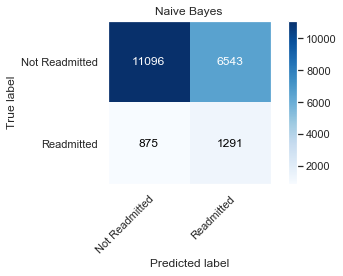

Confusion matrix, without normalization
[[11268  6371]
 [  836  1330]]


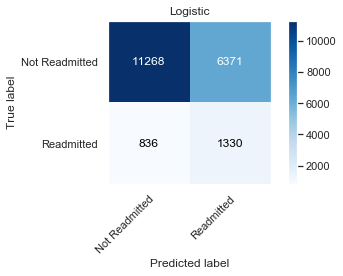

Confusion matrix, without normalization
[[11883  5756]
 [  964  1202]]


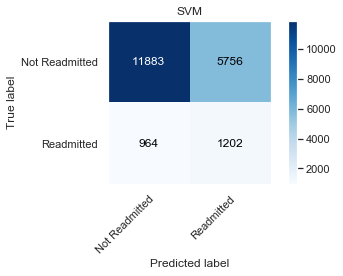

Confusion matrix, without normalization
[[10721  6918]
 [  812  1354]]


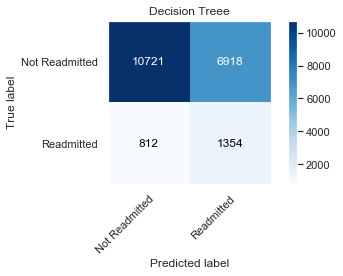

Confusion matrix, without normalization
[[11688  5951]
 [  900  1266]]


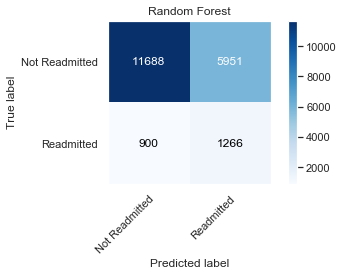

In [124]:
for i in range(len(models)):
    #cm = confusion_matrix(y_test, models_pred[i])
    plot_confusion_matrix(y_test, models_pred[i], classes, title=models[i])
    plt.grid()
    plt.show()